In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas_datareader.data as pdr

import datetime as dt
import yfinance as yf

import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Flatten, Conv1D, MaxPool2D, Input
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.wrappers.scikit_learn import KerasRegressor


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from tensorflow.keras import backend as K

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

# Bagging
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

# Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use('ggplot')

mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.alpha'] = 0.25

mpl.rcParams['legend.fontsize'] = 10

In [3]:
DATADIR = Path.cwd()

filepath = os.path.join(DATADIR, 'data_with_covid.csv')

D = pd.read_csv(filepath, index_col = [0], infer_datetime_format = True)
D.columns = (x.lower() for x in D.columns)

TRAIN_TEST_CUTOFF = int((len(D) * 0.8))

train_set = D.iloc[:TRAIN_TEST_CUTOFF, :]
test_set = D.iloc[TRAIN_TEST_CUTOFF:, :]

scaler = MinMaxScaler(feature_range = (-1, 1))
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

X_train = []
y_train = []

for i in range(len(train_set_scaled)):
    X_train.append(train_set_scaled[i, 1:])
    y_train.append(train_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
print(X_train.shape, y_train.shape)
# y_train_scaled = scaler.fit_transform(np.array(D.loc[index, 'target']).reshape(-1, 1))


(1800, 33, 1) (1800,)


In [4]:
X_train.shape

(1800, 33, 1)

In [5]:
# cnn = Sequential()
# cnn.add(Conv1D(in_channels=1, out_channels=1, kernel_size=2, stride=1))
# cnn.add(Flatten())

In [14]:
def CNN_LSTM():
    model = Sequential()
    model.add(Conv1D(filters = 10, kernel_size = 5, padding = 'same', input_shape = (33, 1)))
    model.add(LSTM(units=33,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=33,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=33,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=33))
    model.add(Dense(units=1))
    return model

In [15]:
model = CNN_LSTM()

model.compile(optimizer="adam", loss="mae", metrics=["mse"])

model.summary()  # print model structure to console


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 33, 10)            60        
                                                                 
 lstm_12 (LSTM)              (None, 33, 33)            5808      
                                                                 
 lstm_13 (LSTM)              (None, 33, 33)            8844      
                                                                 
 lstm_14 (LSTM)              (None, 33, 33)            8844      
                                                                 
 lstm_15 (LSTM)              (None, 33)                8844      
                                                                 
 dense_3 (Dense)             (None, 1)                 34        
                                                                 
Total params: 32,434
Trainable params: 32,434
Non-trai

In [16]:
model.fit(X_train, y_train, epochs = 50, batch_size = 10, verbose=1)

Epoch 1/50
180/180 [==============================] - 6s 16ms/step - loss: 0.1051 - mse: 0.0279
Epoch 2/50
180/180 [==============================] - 3s 16ms/step - loss: 0.0504 - mse: 0.0046
Epoch 3/50
180/180 [==============================] - 3s 15ms/step - loss: 0.0439 - mse: 0.0035
Epoch 4/50
180/180 [==============================] - 3s 16ms/step - loss: 0.0421 - mse: 0.0033
Epoch 5/50
180/180 [==============================] - 3s 15ms/step - loss: 0.0452 - mse: 0.0035
Epoch 6/50
180/180 [==============================] - 3s 16ms/step - loss: 0.0425 - mse: 0.0032
Epoch 7/50
180/180 [==============================] - 3s 17ms/step - loss: 0.0400 - mse: 0.0030
Epoch 8/50
180/180 [==============================] - 3s 15ms/step - loss: 0.0405 - mse: 0.0028
Epoch 9/50
180/180 [==============================] - 2s 14ms/step - loss: 0.0396 - mse: 0.0029
Epoch 10/50
180/180 [==============================] - 2s 13ms/step - loss: 0.0387 - mse: 0.0027
Epoch 11/50
180/180 [==================

In [17]:
predict_train = model.predict(X_train, batch_size=10, verbose=1)
print(predict_train.shape)


180/180 [==============================] - 1s 4ms/step
(1800, 1)


In [18]:
X_test = []
y_test = []

for i in range(len(test_set_scaled)):
    X_test.append(test_set_scaled[i, 1:])
    y_test.append(test_set_scaled[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
y_test.shape

(451,)

In [20]:
y_test = np.reshape(y_test, (-1, 1))
y_train=np.reshape(y_train,(-1,1))

In [21]:
predicted_stock_price=model.predict(X_test)
# predicted_stock_price=predicted_stock_price[:,0]

15/15 [==============================] - 1s 5ms/step


In [22]:
predicted_stock_price

array([[ 6.06388748e-01],
       [ 5.88987291e-01],
       [ 5.72485089e-01],
       [ 5.73195457e-01],
       [ 5.68427742e-01],
       [ 5.84108114e-01],
       [ 6.04893446e-01],
       [ 6.25444174e-01],
       [ 6.28710032e-01],
       [ 6.25985622e-01],
       [ 6.13189757e-01],
       [ 6.24953508e-01],
       [ 6.27175927e-01],
       [ 6.28271282e-01],
       [ 6.71563208e-01],
       [ 6.99481905e-01],
       [ 7.17683196e-01],
       [ 7.02809930e-01],
       [ 6.89512432e-01],
       [ 6.20813370e-01],
       [ 6.25710249e-01],
       [ 6.23049617e-01],
       [ 6.18814230e-01],
       [ 5.99910378e-01],
       [ 6.19926214e-01],
       [ 6.29659772e-01],
       [ 6.16078019e-01],
       [ 6.12425268e-01],
       [ 6.02726102e-01],
       [ 5.99385738e-01],
       [ 5.96745849e-01],
       [ 5.91510355e-01],
       [ 6.03980303e-01],
       [ 5.96123338e-01],
       [ 5.79284608e-01],
       [ 5.49872875e-01],
       [ 5.42661488e-01],
       [ 5.65509737e-01],
       [ 5.7

In [23]:
from sklearn.metrics import mean_squared_error
import math
def print_error(trainY, testY, train_predict, test_predict):    
    ### Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    ### Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
print_error(y_train, y_test, predict_train, predicted_stock_price)

Train RMSE: 0.032 RMSE
Test RMSE: 0.204 RMSE


In [24]:
predicted_stock_price.shape

(451, 1)

In [25]:
pred_array = np.repeat(predicted_stock_price, len(D.columns), axis = -1)

pred_array.shape

(451, 34)

In [26]:
pred = scaler.inverse_transform(pred_array)[:,0]

In [27]:
graph_test = pd.DataFrame(test_set.iloc[:,0])
graph_test['pred'] = pred
graph_test

,gold,pred
Date,,
9/12/2020,1839.55,1864.286133
10/12/2020,1836.57,1855.477173
11/12/2020,1839.85,1847.123413
14/12/2020,1827.35,1847.483032
15/12/2020,1853.64,1845.069580
...,...,...
17/11/2022,1760.44,1577.318359
18/11/2022,1750.68,1573.945801
21/11/2022,1738.05,1563.145752


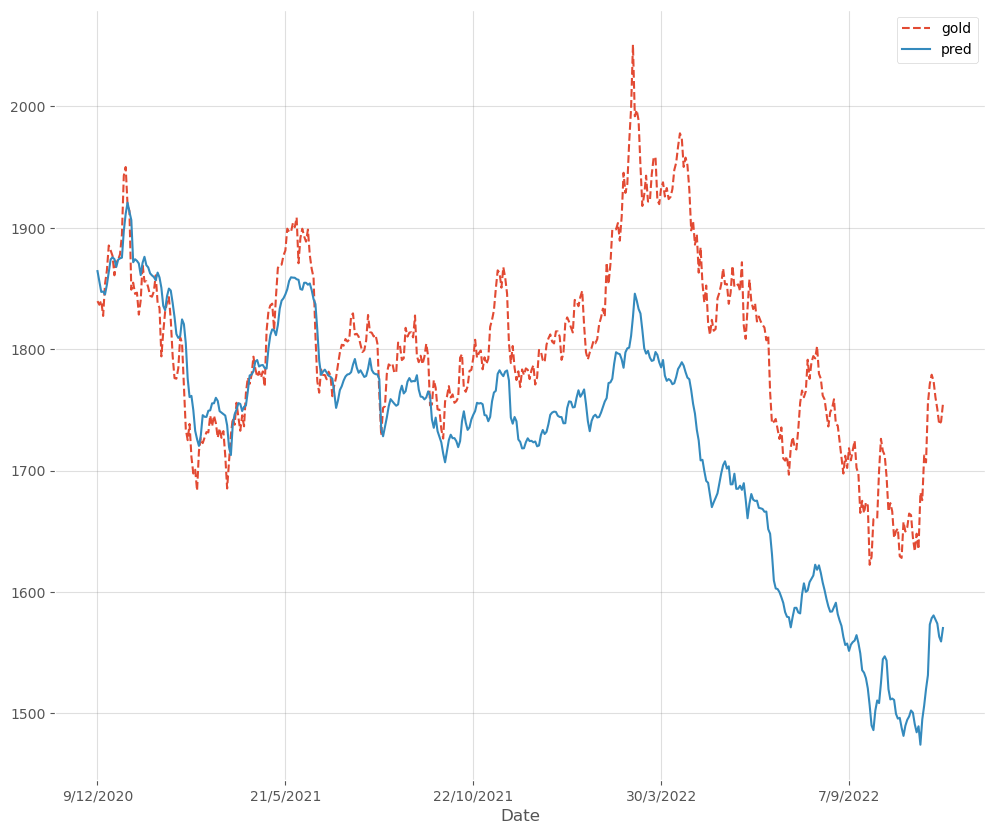

In [28]:
fig, ax = plt.subplots(figsize = (12,10))
graph_test['gold'].plot(linestyle = '--')
graph_test['pred'].plot(linestyle = '-')
ax.legend()